In [223]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [224]:
customer = pd.read_csv('customers.csv', delimiter=',')
customer.head()

,customer_id,birth_date,signed_up_from_channel
0,835f110d2db18bd1b3acc3a63063c59ad125a254,1967-01-01,Web
1,332d56903494dbe693961f0dd0cb71c18a4484a6,1995-01-01,Web
2,3c06e11e88d6bdcd4745a31e6e3d76f2d58c206d,1980-01-01,Web
3,550147e201b11906a024a7f410e6a46135cdef46,1951-01-01,Web
4,2efaa505f57c11be29c0bc56a26b0cadf8061fed,1987-01-01,Web


In [225]:
order_lines = pd.read_csv('order_lines.csv')
order_lines.head()

,order_id,customer_id,delivery_date,is_delivery,zip_place,product_id,quantity,net_unit_price,is_from_recipe,is_from_product_list
0,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,20329,1.0,45.22,False,False
1,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,9329,3.0,4.78,False,False
2,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,2329,1.0,25.13,False,False
3,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,8360,1.0,29.52,False,False
4,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,26525,2.0,2.96,False,False


In [226]:
products = pd.read_csv('products.csv')
products[products.product_id ==9329]

,product_id,product_name,main_category,sub_category,brand
5687,9329,Banan Colombia 1.00 stk,Frukt og grÃ¸nt,Frukt,NaN


# Analyse 

In [227]:
customer.dtypes


customer_id               object
birth_date                object
signed_up_from_channel    object
dtype: object

In [228]:
order_lines.dtypes

order_id                 object
customer_id              object
delivery_date            object
is_delivery                bool
zip_place                object
product_id                int64
quantity                float64
net_unit_price          float64
is_from_recipe             bool
is_from_product_list       bool
dtype: object

In [229]:
youngest = customer["birth_date"].min()
oldest = customer["birth_date"].max()
#print(youngest, oldest)

In [243]:
thisdate = datetime.datetime.now()
thisyear = thisdate.year
#print("Thisyear:", thisyear)


for rom in customer:
    customer['birth_date'] = customer['birth_date'].str.slice(0,4)

customer["birth_date"] = customer["birth_date"].astype(int)
mean_birth = customer['birth_date'].mean()
median_birth = customer['birth_date'].median()


print("Mean birth", mean_birth)
print("Median birth",median_birth)


Mean birth 1978.406976744186
Median birth 1981.0


In [244]:
#order_lines_drop = order_lines.drop(['product_id','quantity', 'net_unit_price', 'is_from_recipe', 'is_from_product_list'], axis = 1)

order_lines_gr = order_lines.groupby(['order_id']).first()
unique_customers = order_lines_gr['customer_id'].nunique()
unique_orders = len(order_lines_gr)

#print(order_lines_gr)



#Number of purchases for each customer
no_purchases = order_lines_gr.groupby(['customer_id'])['product_id'].count()
#Number of products each customer has purchased in total
no_products = order_lines.groupby(['customer_id'])['quantity'].sum()
order_lines["sum_product"] = order_lines['quantity']*order_lines['net_unit_price']
sum_products = order_lines.groupby(['customer_id'])['sum_product'].sum()


print("Sum of the orders:", no_products.sum())
print("No. of unique customer id's:",unique_customers)
print("No. of unique orders:", unique_orders)
print("Average order no.:", no_purchases.mean())
print("Median no: ", no_purchases.median())

#print("Sum Products", sum_products)
#print("Number of purchases: ", no_purchases)
#print()
#print("Number of products:", no_products)

Sum of the orders: 343802.0
No. of unique customer id's: 946
No. of unique orders: 8580
Average order no.: 9.069767441860465
Median no:  4.0


In [245]:
def purchase_stats(no_products, no_purchases, sum_products):
    frequent_avg = 0
    counter_freq = 0
    rarely_avg = 0
    counter_rare = 1
    frequent_sum = 0
    rarely_sum = 0
    money_freq = 0
    money_rare = 0
    for i in range (len(no_purchases)):
        if (no_purchases[i] >= 9):
            frequent_avg += int(no_products[i]/no_purchases[i])
            frequent_sum += no_products[i]
            money_freq += sum_products[i]/no_purchases[i]
            counter_freq += 1
            #print(no_products[col])
        else:
            rarely_avg += int(no_products[i]/no_purchases[i])
            rarely_sum += no_products[i]
            money_rare += (sum_products[i]/no_purchases[i])
            counter_rare += 1
                
    return frequent_avg, rarely_avg, counter_freq, counter_rare, frequent_sum, rarely_sum, money_freq, money_rare



In [246]:
freq_avg, rare_avg, count_freq, count_rare, freq_sum, rare_sum, freq_mon, rare_mon = purchase_stats(no_products, no_purchases, sum_products)
#This is how many unique items they bought. 
avg_freq = freq_avg/count_freq
avg_rare = rare_avg/count_rare
avg_mon_freq = freq_mon/count_freq
avg_mon_rare = rare_mon/count_rare
print()
print("Frequent shoppers:", count_freq)
print("Sum of products", freq_sum) 
print("Average no. of products per order: ", avg_freq)
print("Average money spent on purchase:", avg_mon_freq)
print()
print("Unfrequent shoppers:", count_rare) 
print("Sum of products", rare_sum) 
print("Average no. of products per order: ", avg_rare)
print("Average money spent on purchase:", avg_mon_rare)



Frequent shoppers: 289
Sum of products 277710.0
Average no. of products per order:  42.10726643598616
Average money spent on purchase: 1118.05624086

Unfrequent shoppers: 658
Sum of products 66092.0
Average no. of products per order:  33.46048632218845
Average money spent on purchase: 908.886225756


In [247]:
#order_lines["is_delivery"] = order_lines["is_delivery"].astype(str)
#order_lines.dtypes

In [248]:
def delivery_type(no_products, no_purchases, sum_products):
    #Første index er antall personer som fikk varene hjemlevert. 
    #Andre indeex er antall eprsoner som plukket opp vare på hentested
    delivery_freq = np.array([[],[]])
    delivery_rare = np.array([[],[]])
    for i in range (len(no_purchases)):
        if (no_purchases[i] >= 9):
            if (order_lines["is_delivery"]== True):
                delivery_freq[0] += 1
            else:
                delivery_freq[1] += 1
        else:
            if (order_lines["is_delivery"] == True):
                delivery_rare[0] += 1
            else:
                delivery_rare[1] += 1
    return delivery_freq, delivery_rare

    

In [249]:
#del_freq, del_rare = delivery_type(no_products, no_purchases, sum_products)

In [250]:
def age(no_products, no_purchases, sum_products, youngest, oldest):
    age_stats_freq = dict()
    age_stats_rare = dict()
    i = 1
    for i in range(len(no_products)):
        if (no_purchases[i] >= 9):
            if (customer["birth_date"][i] in age_stats_freq):
                age_stats_freq[customer["birth_date"][i]] += 1
            else:
                age_stats_freq[customer["birth_date"][i]] = 1
        else:
            if (customer["birth_date"][i] in age_stats_rare):
                age_stats_rare[customer["birth_date"][i]] += 1
            else:
                age_stats_rare[customer["birth_date"][i]] = 1

    return age_stats_freq, age_stats_rare

 

In [258]:
age_freq, age_rare = age(no_products, no_purchases, sum_products, youngest, oldest)

#age_freq = np.array(list(age_freq.keys()))


sorted(age_freq.keys())
sorted(age_rare.keys())

print(age_freq)
print()
print(age_rare)

{1991: 11, 1986: 13, 1977: 4, 1980: 11, 1981: 14, 1976: 8, 1982: 13, 1974: 10, 1983: 15, 1978: 15, 1973: 11, 1942: 1, 1996: 2, 1975: 15, 1954: 1, 1968: 5, 1969: 7, 1979: 13, 1997: 2, 1963: 1, 1990: 4, 1985: 7, 1971: 7, 1992: 5, 1988: 10, 1972: 4, 1962: 3, 1984: 12, 1987: 13, 1970: 4, 1967: 3, 1951: 3, 1989: 10, 1947: 1, 1950: 1, 1958: 2, 1952: 3, 1994: 4, 1993: 1, 1961: 2, 1948: 3, 1955: 1, 1995: 3, 1946: 2, 1960: 2, 2000: 1, 1956: 2, 1938: 1, 1953: 1, 1944: 1, 1966: 1}

{1967: 9, 1995: 10, 1980: 26, 1951: 4, 1987: 26, 1981: 34, 1986: 27, 1994: 15, 1979: 21, 1965: 5, 1984: 25, 1972: 12, 1971: 9, 1974: 19, 1982: 37, 1973: 19, 1990: 22, 1976: 20, 1999: 4, 1952: 2, 1945: 3, 1978: 26, 1963: 4, 1977: 29, 1970: 8, 1966: 6, 1969: 6, 1992: 9, 1991: 10, 1983: 26, 1985: 27, 1988: 26, 1959: 5, 1968: 11, 1931: 1, 1993: 12, 1989: 14, 1960: 4, 1996: 9, 1933: 3, 1975: 22, 1964: 7, 1953: 3, 1937: 3, 1958: 1, 1956: 2, 1998: 2, 2000: 1, 1957: 2, 1941: 1, 1997: 2, 1961: 5, 1950: 3, 1955: 1, 1949: 2, 1918

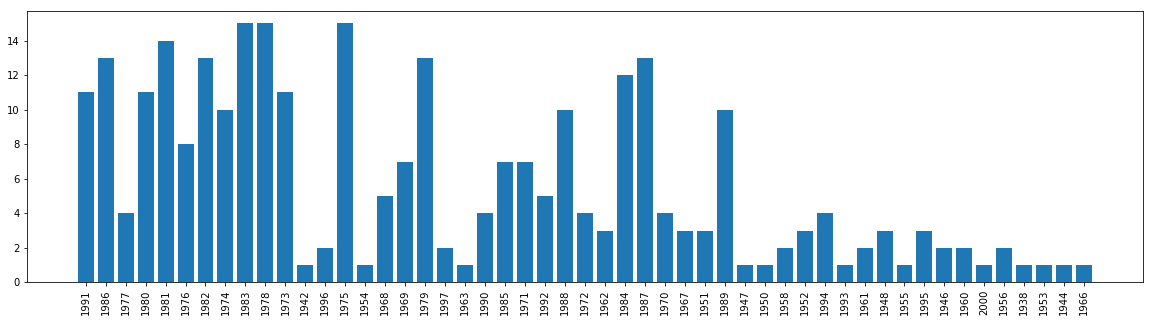

In [254]:

years = list(age_freq.keys())
values = list(age_freq.values())

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(range(len(age_freq)),values,tick_label=years)


plt.show()



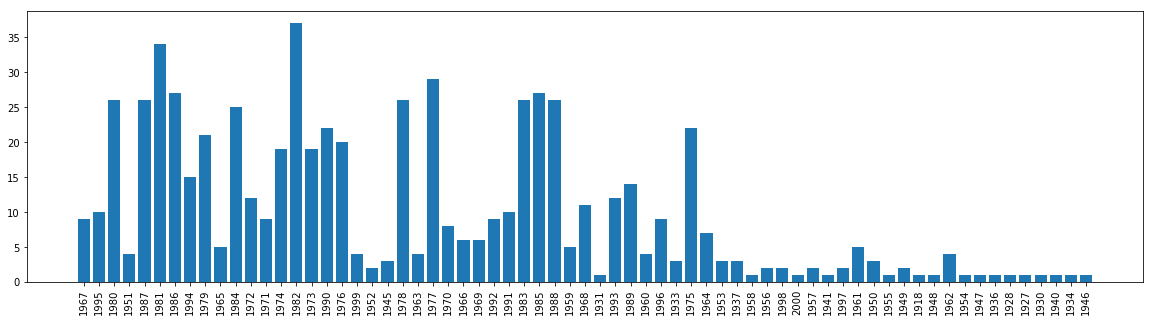

In [255]:

years = list(age_rare.keys())
values = list(age_rare.values())

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(range(len(age_rare)),values,tick_label=years)


plt.show()
